# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as json
import pprint as pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['bambous virieux',
 'jiangyan',
 'srednekolymsk',
 'ilulissat',
 'carnarvon',
 'mar del plata',
 'punta arenas',
 'yellowknife',
 'mataura',
 'makakilo city',
 'ushuaia',
 'port alfred',
 'mpika',
 'namibe',
 'barrow',
 'torbay',
 'busselton',
 'bethel',
 'richmond',
 'mehamn',
 'sept-iles',
 'khani',
 'saint-philippe',
 'mahina',
 'new norfolk',
 'pandan',
 'bafq',
 'dikson',
 'sentyabrskiy',
 'linjiang',
 'cape town',
 'nam phong',
 'bundibugyo',
 'bredasdorp',
 'los llanos de aridane',
 'kirakira',
 'semirom',
 'lasa',
 'petropavlovsk-kamchatskiy',
 'mokokchung',
 'mahebourg',
 'kidal',
 'andenes',
 'fort saint john',
 'grand gaube',
 'roebourne',
 'tsihombe',
 'avarua',
 'itarema',
 'vaini',
 'kupang',
 'east london',
 'rikitea',
 'moyale',
 'kasamwa',
 'oktyabrskoye',
 'hobart',
 'luwuk',
 'toba',
 'wangqing',
 'ambovombe',
 'altay',
 'vostok',
 'coahuayana',
 'longyearbyen',
 'luderitz',
 'victoria',
 'barentsburg',
 'illoqqortoormiut',
 'punta de piedra',
 'takoradi',
 'cherski

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [135]:
# This could take a minute...  I am filling the lists 
# for all of the dataframe objects from within the loop.
# The very generic Try / except / continue script that 
# I'm using is eliminating any entry without data!

City = []
Country = []
Lat = []
Lng = []
Date = []
Descript = []
Cloudiness = []
Max_Temp = []
Humidity = []
Wind_Speed = []
response = []
print('Beginning Data Retrieval')
print('----------------------------')
for i in range (len(cities)):
    response.append(requests.get(query_url + cities[i]).json())
    try: 
        City.append(response[i]["name"])
        Country.append(response[i]['sys']['country'])
        Lat.append(response[i]['coord']['lat'])
        Lng.append(response[i]['coord']['lon'])
        Date.append(response[i]['sys']['sunrise'])
        Descript.append(response[i]['weather'][0]['description'])
        Cloudiness.append(response[i]['clouds']['all'])
        Max_Temp.append(response[i]['main']['temp_max'])
        Humidity.append(response[i]['main']['humidity'])
        Wind_Speed.append(response[i]['wind']['speed'])
    except:
        continue
    print(f'Processing Record for: '+ cities[i]) 
    i+=1
    

Beginning Data Retrieval
----------------------------
Processing Record for: bukan
Processing Record for: longyan
Processing Record for: barrow
Processing Record for: nikolskoye
Processing Record for: busselton
Processing Record for: ejutla de crespo
Processing Record for: kahului
Processing Record for: petropavlovsk-kamchatskiy
Processing Record for: ushuaia
Processing Record for: kaitangata
Processing Record for: bredasdorp
Processing Record for: georgetown
Processing Record for: kapaa
Processing Record for: xixiang
Processing Record for: fortuna
Processing Record for: vysokogornyy
Processing Record for: morondava
Processing Record for: ugento
Processing Record for: faya
Processing Record for: butaritari
Processing Record for: ostrovnoy
Processing Record for: pevek
Processing Record for: hobart
Processing Record for: rikitea
Processing Record for: lompoc
Processing Record for: thompson
Processing Record for: khatanga
Processing Record for: longyearbyen
Processing Record for: atuona
P

Processing Record for: richards bay
Processing Record for: alpena
Processing Record for: maniitsoq
Processing Record for: kikwit
Processing Record for: gander
Processing Record for: gat
Processing Record for: balkanabat
Processing Record for: elbrus
Processing Record for: dingle
Processing Record for: ilhabela
Processing Record for: conceicao da barra
Processing Record for: cidreira
Processing Record for: yar-sale
Processing Record for: maniwaki
Processing Record for: tutoia
Processing Record for: sorong
Processing Record for: afsin
Processing Record for: hun
Processing Record for: dalvik
Processing Record for: zharkent
Processing Record for: praia da vitoria
Processing Record for: vardo
Processing Record for: puerto ayacucho
Processing Record for: nokaneng
Processing Record for: guanica
Processing Record for: beloha
Processing Record for: awjilah
Processing Record for: berlevag
Processing Record for: ahuimanu
Processing Record for: husavik
Processing Record for: yuryevets
Processing R

Processing Record for: grants
Processing Record for: marabba
Processing Record for: margate
Processing Record for: mitu
Processing Record for: carballo
Processing Record for: edea
Processing Record for: qaqortoq
Processing Record for: susuman
Processing Record for: nadezhda
Processing Record for: ayagoz
Processing Record for: petershagen
Processing Record for: kpalime
Processing Record for: iisalmi
Processing Record for: pascagoula
Processing Record for: kumo
Processing Record for: mindelo
Processing Record for: sur
Processing Record for: lobva
Processing Record for: port lincoln
Processing Record for: mus
Processing Record for: faxinal
Processing Record for: homer
Processing Record for: palauig
Processing Record for: lewiston
Processing Record for: hay river
Processing Record for: pangnirtung
Processing Record for: marovoay
Processing Record for: lianran
Processing Record for: iguape
Processing Record for: comodoro rivadavia
Processing Record for: andijon
Processing Record for: isiro


In [136]:
len(response)

604

In [138]:
len(City)

566

In [139]:
len(Country)

566

In [140]:
len(Lat)

566

In [141]:
len(Lng)

566

In [142]:
len(Date)

566

In [143]:
len(Descript)

566

In [144]:
len(Cloudiness)

566

In [145]:
len(Max_Temp)

566

In [146]:
len(Humidity)

566

In [147]:
len(Wind_Speed)

566

In [59]:
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "base": "stations",
        "clouds": {
            "all": 64
        },
        "cod": 200,
        "coord": {
            "lat": 36.52,
            "lon": 46.21
        },
        "dt": 1567959382,
        "id": 139889,
        "main": {
            "grnd_level": 840.83,
            "humidity": 35,
            "pressure": 1007.07,
            "sea_level": 1007.07,
            "temp": 23.68,
            "temp_max": 23.68,
            "temp_min": 23.68
        },
        "name": "Bukan",
        "sys": {
            "country": "IR",
            "message": 0.0059,
            "sunrise": 1567909899,
            "sunset": 1567955687
        },
        "timezone": 16200,
        "weather": [
            {
                "description": "broken clouds",
                "icon": "04n",
                "id": 803,
                "main": "Clouds"
            }
        ],
        "wind": {
            "deg": 10.784,
            "speed": 5.75
        }
    },
    {
        "base":

In [78]:
print(response[0])

{'coord': {'lon': 46.21, 'lat': 36.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.68, 'pressure': 1007.07, 'humidity': 35, 'temp_min': 23.68, 'temp_max': 23.68, 'sea_level': 1007.07, 'grnd_level': 840.83}, 'wind': {'speed': 5.75, 'deg': 10.784}, 'clouds': {'all': 64}, 'dt': 1567959382, 'sys': {'message': 0.0059, 'country': 'IR', 'sunrise': 1567909899, 'sunset': 1567955687}, 'timezone': 16200, 'id': 139889, 'name': 'Bukan', 'cod': 200}


In [85]:
response[0].keys()

dict_keys(['coord', 'weather', 'base', 'main', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [126]:
response[0]["name"]

TypeError: list indices must be integers or slices, not str

In [131]:
response[0]['weather'][0]['description']

'broken clouds'

In [115]:
response[0]['clouds']['all']

64

In [111]:
response[0]['main']

{'temp': 23.68,
 'pressure': 1007.07,
 'humidity': 35,
 'temp_min': 23.68,
 'temp_max': 23.68,
 'sea_level': 1007.07,
 'grnd_level': 840.83}

In [116]:
response[0]['main']['temp']

23.68

In [117]:
response[0]['main']['humidity']

35

In [118]:
response[0]['main']['temp_max']

23.68

In [121]:
response[0]['sys']['country']

'IR'

In [122]:
response[0]['sys']['sunrise']

1567909899

In [123]:
response[0]['wind']['speed']

5.75

In [124]:
response[0]['coord']['lon']

46.21

In [125]:
response[0]['coord']['lat']

36.52

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [148]:
Weather={
    'City':City,
    'Country':Country,
    'Lat':Lat,
    'Lng':Lng,
    'Date':Date,
    'Descript':Descript,
    'Cloudiness':Cloudiness,
    'Max_Temp':Max_Temp,
    'Humidity':Humidity,
    'Wind_Speed':Wind_Speed    
}
WDF = pd.DataFrame(Weather)
WDF.head()

,City,Country,Lat,Lng,Date,Descript,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,Bukan,IR,36.52,46.21,1567909899,scattered clouds,34,15.55,59,1.57
1,Longyan,CN,25.10,117.03,1567979732,light rain,0,21.15,89,0.67
2,Barrow,AR,-38.31,-60.23,1567937569,overcast clouds,100,13.65,70,0.13
3,Nikolskoye,RU,59.70,30.79,1567912073,clear sky,0,19.44,55,2.00
4,Busselton,AU,-33.64,115.35,1567981631,clear sky,0,8.33,71,2.77


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

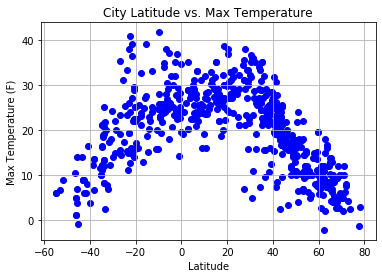

In [151]:
plt.scatter(WDF["Lat"], WDF["Max_Temp"], marker="o", color="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_vs_Max_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Temperature Plot

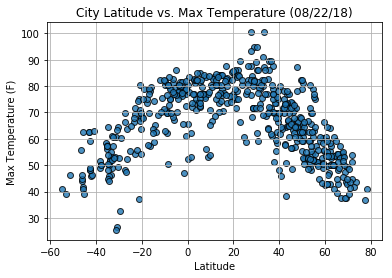

#### Latitude vs. Humidity Plot

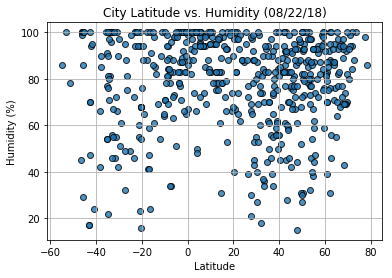

#### Latitude vs. Cloudiness Plot

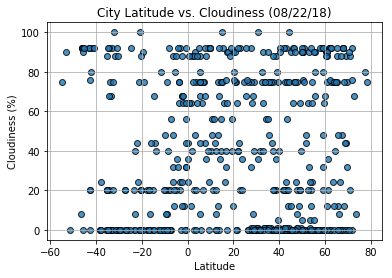

#### Latitude vs. Wind Speed Plot

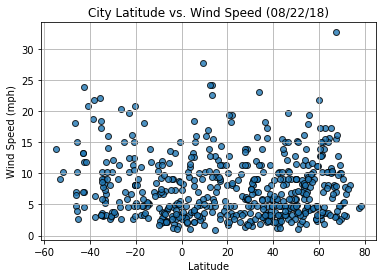